## Data Collection / Preprocessing

In [192]:
from scipy.io import wavfile as wav
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pydub import AudioSegment, effects
from pydub.silence import split_on_silence, detect_nonsilent, detect_silence
from scipy.signal import argrelextrema, find_peaks, peak_prominences, find_peaks_cwt, normalize
from sklearn.metrics import accuracy_score

In [2]:
## CURRENTLY UNUSED FUNCTIONS!!!!!!!!!!!!!!!

def build_list(artist, clip_number, length):
    i = 1
    artist_list = []
    while i <= length :
        name = artist + "/" + str(clip_number) + "/" +str(i) + ".wav"
        artist_list.append(name)
        i += 1
    return artist_list

def split_silence_chunks(wavfile, silence_length, threshold, file_names_list):
    sound_file = AudioSegment.from_wav(wavfile)
    audio_chunks = split_on_silence(sound_file, 
                        min_silence_len=silence_length,
                        silence_thresh=threshold)
    for i in range (len(audio_chunks)) :
        chunk = audio_chunks[i]
        chunk.export(file_names_list[i], format='wav')
    print("Exported " + str(len(audio_chunks)) + " files")

def get_wav_mp3(mp3_file, wav_name):
    song = AudioSegment.from_mp3(mp3_file)
    new_song = song.export(wav_name, format="wav")
    #print("Exported file as: " + wav_name)
    return new_song
   

In [190]:
def get_wav_mp4(mp4_file, wav_name):
    song = AudioSegment.from_file(mp4_file, "mp4")
    new_song = song.export(wav_name, format="wav")
    return new_song

def detect_leading_silence(sound):
    '''I am still trying to figure out the best values for these silence criteria'''
    chunk_size = 10
    silence_threshold = -20
    trim_ms = 0 

    assert chunk_size > 0 # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    return trim_ms

def set_target_amplitude(sound, target_dBFS = -30):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)


## Shuffle

 **1** (Source : https://www.youtube.com/watch?v=aJa3DYnAjqU )

** Step 1:** Save file as wav

In [4]:
get_wav_mp4('../../Source/Uncut/Shuffle_1.mp4', '../../Source/Uncut/Shuffle_1.wav');

**Step 2:** Manually extract the relevant clip. Set channel to 1 (mono). <br/>
**Step 2.5**: Set target amplitude (target_dBFS = -30)<br/>
**Step 2.5.5**: Normalize???? (Is this redundant? Check out pydub source code)

In [5]:
song = AudioSegment.from_wav('../../Source/Uncut/Shuffle_1.wav')
song = song.set_channels(1)
song = set_target_amplitude(song)
song = song.normalize()
start = 30 * 1000
end = 34 * 1000
three_shuffles = song[start:end]

**Step 3:** Split up the audio into its components. This could also be done with split on silence. Split on time needs to be fixed. (Index error)

In [6]:
shuffle_1 = three_shuffles[:(three_shuffles.duration_seconds/3)*1000]
shuffle_2 = three_shuffles[(three_shuffles.duration_seconds/3)*1000:(three_shuffles.duration_seconds/3)*2000]
shuffle_3 = three_shuffles[(three_shuffles.duration_seconds/3)*2000:]

**Step 4:** Cut the intro/outro silence from the clips. Save and export as wav files

In [7]:
path_list = [shuffle_1, shuffle_2, shuffle_3]
for i in path_list:
    sound = i
#    start_trim = detect_leading_silence(sound)
#    end_trim = detect_leading_silence(sound.reverse())
#    duration = len(sound)    
#    trimmed_sound = sound[start_trim:duration-end_trim]
    trimmed_sound = sound
    trimmed_sound.export('../../Source/Shuffle/1/'+ str(path_list.index(i)+1)+ '.wav', format='wav')

 **2** (Source: https://en.wikipedia.org/wiki/Tap_dance_technique )

In [8]:
full_clip = AudioSegment.from_file('../../Source/Uncut/Tap_Dance_Technique_2.webm', "webm")
full_clip.export('../../Source/Uncut/Tap_Dance_Technique_2.wav', format="wav");

In [9]:
song = AudioSegment.from_wav('../../Source/Uncut/Tap_Dance_Technique_2.wav')
song = song.set_channels(1)
song = set_target_amplitude(song)
song = song.normalize()
# I during feature extraction that this clip has a frame_width of 4 instead of 2
song = song.set_sample_width(2)
start = 7.5 * 1000
end = 9 * 1000
shuffle = song[start:end]

In [10]:
path_list = [shuffle]
for i in path_list:
    sound = i
#    start_trim = detect_leading_silence(sound)
#    end_trim = detect_leading_silence(sound.reverse())
#    duration = len(sound)    
#    trimmed_sound = sound[start_trim:duration-end_trim]
    trimmed_sound = sound
    trimmed_sound.export('../../Source/Shuffle/2/'+ str(path_list.index(i)+1)+ '.wav', format='wav')

 **3** (Source: https://www.youtube.com/watch?v=dYCtgIm43Rk )

In [11]:
get_wav_mp4('../../Source/Uncut/Shuffleballchange_3.mp4', '../../Source/Uncut/Shuffle_Ball_Change_3.wav');

In [12]:
song = AudioSegment.from_wav('../../Source/Uncut/Shuffle_Ball_Change_3.wav')
song = song.set_channels(1)
song = set_target_amplitude(song)
song = song.normalize()
start = 15 * 1000
end = 16 * 1000
shuffle = song[start:end]

In [13]:
path_list = [shuffle]
for i in path_list:
    sound = i
#    start_trim = detect_leading_silence(sound)
#    end_trim = detect_leading_silence(sound.reverse())
#    duration = len(sound)    
#    trimmed_sound = sound[start_trim:duration-end_trim]
    trimmed_sound = sound
    trimmed_sound.export('../../Source/Shuffle/3/'+ str(path_list.index(i)+1)+ '.wav', format='wav')

**4** (Source: https://www.youtube.com/watch?v=Xbamib_k874 )

In [14]:
get_wav_mp4('../../Source/Uncut/Shuffle_Ball_Change_4.mp4', '../../Source/Uncut/Shuffle_Ball_Change_4.wav');

In [15]:
song = AudioSegment.from_wav('../../Source/Uncut/Shuffle_Ball_Change_4.wav')
song = song.set_channels(1)
song = set_target_amplitude(song)
song = song.normalize()
start = 29.5 * 1000
end = 33 * 1000
shuffle_bc_2x = song[start:end]

In [16]:
shuffle_1 = shuffle_bc_2x[0:975]
shuffle_2 = shuffle_bc_2x[2000:2800]

In [17]:
path_list = [shuffle_1, shuffle_2]
for i in path_list:
    sound = i
#    start_trim = detect_leading_silence(sound)
#    end_trim = detect_leading_silence(sound.reverse())
#    duration = len(sound)    
#    trimmed_sound = sound[start_trim:duration-end_trim]
    trimmed_sound = sound
    trimmed_sound.export('../../Source/Shuffle/4/'+ str(path_list.index(i)+1)+ '.wav', format='wav')

## Ball change

**1** (Source: https://www.youtube.com/watch?v=hi0wkLqPGR0 )

In [18]:
get_wav_mp4('../../Source/Uncut/Ball_change_1.mp4', '../../Source/Uncut/Ball_change_1.wav');

In [19]:
song = AudioSegment.from_wav('../../Source/Uncut/Ball_change_1.wav')
song = song.set_channels(1)
song = set_target_amplitude(song)
song = song.normalize()
start = 48.5 * 1000
end = 52 * 1000
three_ball_changes = song[start:end]

In [20]:
ball_change_1 = three_ball_changes[:(three_ball_changes.duration_seconds/3)*1000]
ball_change_2 = three_ball_changes[(three_ball_changes.duration_seconds/3)*1000:(three_ball_changes.duration_seconds/3)*2000]
ball_change_3 = three_ball_changes[(three_ball_changes.duration_seconds/3)*2000:]

In [21]:
path_list = [ball_change_1, ball_change_2, ball_change_3]
for i in path_list:
    sound = i
#    start_trim = detect_leading_silence(sound)
#    end_trim = detect_leading_silence(sound.reverse())
#    duration = len(sound)    
#    trimmed_sound = sound[start_trim:duration-end_trim]
    trimmed_sound = sound
    trimmed_sound.export('../../Source/Ball_change/1/'+ str(path_list.index(i)+1)+ '.wav', format='wav')

 **2** (Source: https://en.wikipedia.org/wiki/Tap_dance_technique )

In [22]:
song = AudioSegment.from_wav('../../Source/Uncut/Tap_Dance_Technique_2.wav')
song = song.set_channels(1)
song = set_target_amplitude(song)
song = song.normalize()
# I during feature extraction that this clip has a frame_width of 4 instead of 2
song = song.set_sample_width(2)
start = 28 * 1000
end = 29.5 * 1000
ball_change = song[start:end]

In [23]:
path_list = [ball_change]
for i in path_list:
    sound = i
#    start_trim = detect_leading_silence(sound)
#    end_trim = detect_leading_silence(sound.reverse())
#    duration = len(sound)    
#    trimmed_sound = sound[start_trim:duration-end_trim]
    trimmed_sound = sound
trimmed_sound.export('../../Source/Ball_change/2/'+ str(path_list.index(i)+1)+ '.wav', format='wav')

<_io.BufferedRandom name='../../Source/Ball_change/2/1.wav'>

 **3** (Source: https://www.youtube.com/watch?v=dYCtgIm43Rk )

In [24]:
song = AudioSegment.from_wav('../../Source/Uncut/Shuffle_Ball_Change_3.wav')
song = song.set_channels(1)
song = set_target_amplitude(song)
song = song.normalize()
start = 3.5 * 1000
end = 3.9 * 1000
ball_change = song[start:end]

In [25]:
path_list = [ball_change]
for i in path_list:
    sound = i
#    start_trim = detect_leading_silence(sound)
#    end_trim = detect_leading_silence(sound.reverse())
#    duration = len(sound)    
#    trimmed_sound = sound[start_trim:duration-end_trim]
    trimmed_sound = sound
    trimmed_sound.export('../../Source/Ball_change/3/'+ str(path_list.index(i)+1)+ '.wav', format='wav')

**4** (Source: https://www.youtube.com/watch?v=Xbamib_k874)

In [26]:
song = AudioSegment.from_wav('../../Source/Uncut/Shuffle_Ball_Change_4.wav')
song = song.set_channels(1)
song = set_target_amplitude(song)
song = song.normalize()
start = 29.5 * 1000
end = 33 * 1000
shuffle_bc_2x = song[start:end]

In [27]:
ball_change_1 = shuffle_bc_2x[975:2000]
ball_change_2 = shuffle_bc_2x[2800:]

In [60]:
path_list = [ball_change_1, ball_change_2]
for i in path_list:
    sound = i
#    start_trim = detect_leading_silence(sound)
#    end_trim = detect_leading_silence(sound.reverse())
#    duration = len(sound)    
#    trimmed_sound = sound[start_trim:duration-end_trim]
    trimmed_sound = sound
    trimmed_sound.export('../../Source/Ball_change/4/'+ str(path_list.index(i)+1)+ '.wav', format='wav')

## Normalization of audio files (HOPEFULLY)

In [414]:
def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

In [415]:
file_list = ['Shuffle/1/1', 'Shuffle/1/2', 'Shuffle/1/3', 'Shuffle/2/1', 'Shuffle/3/1', 'Shuffle/4/1', 'Shuffle/4/2',
            'Ball_change/1/1', 'Ball_change/1/2', 'Ball_change/1/3', 'Ball_change/2/1', 'Ball_change/3/1', 'Ball_change/4/1', 'Ball_change/4/2'] 

for i in file_list:  
    sound = AudioSegment.from_wav('../../Source/' + i + '.wav')
    normalized_sound = match_target_amplitude(sound, -20)
    normalized_sound.export("../../Source/Normal/" + i + '.wav', format="wav")

In [416]:
for i in file_list:  
    sound = AudioSegment.from_wav('../../Source/' + i + '.wav')
    print(sound.dBFS)
for i in file_list:  
    sound = AudioSegment.from_wav('../../Source/Normal/' + i + '.wav')
    print(sound.dBFS)

-35.407502867553205
-33.15029340480577
-33.99744373270901
-30.29164426856982
-22.076604579929754
-31.01438027812177
-32.715614586553286
-28.370798439033223
-30.026992268801944
-29.672753272586945
-27.549264044723728
-22.969339179637338
-28.864000746924063
-28.32920591117081
-20.074004472294703
-20.039319565109217
-20.04464669783558
-21.26406720878561
-20.00212083742674
-19.99417036580705
-20.039319565109217
-20.041982723075215
-20.036657223436862
-20.039319565109217
-20.127637798851126
-20.007425197675907
-19.996819714504753
-19.99417036580705


## Cutting out silence

In [115]:
# file_list = ['Shuffle/1/1', 'Shuffle/1/2', 'Shuffle/1/3', 'Shuffle/2/1', 'Shuffle/3/1', 'Shuffle/4/1', 'Shuffle/4/2',
#             'Ball_change/1/1', 'Ball_change/1/2', 'Ball_change/1/3', 'Ball_change/2/1', 'Ball_change/3/1', 'Ball_change/4/1', 'Ball_change/4/2']
# 
# for i in file_list:
#     samplingFrequency, signalData = wav.read('../../Source/' + i + '.wav')
#     signalData_normed = normalize(signalData, samplingFrequency) # Am I using this correctly?!?!?!?!
#     signalData_normed = signalData_normed[0]
#     wav.write('../../Source/Normal/' + i + '.wav', rate, signalData_normed)
#     

In [358]:
#def detect_silence(audio_segment, min_silence_len=1000, silence_thresh=-16, seek_step=1):

file_list = ['Shuffle/1/1', 'Shuffle/1/2', 'Shuffle/1/3', 'Shuffle/2/1', 'Shuffle/3/1', 'Shuffle/4/1', 'Shuffle/4/2',
            'Ball_change/1/1', 'Ball_change/1/2', 'Ball_change/1/3', 'Ball_change/2/1', 'Ball_change/3/1', 'Ball_change/4/1', 'Ball_change/4/2']


for i in file_list:
    song = AudioSegment.from_wav('../../Source/Normal/' + i + '.wav')
    print (i)
    print (song.dBFS)
    print (song.duration_seconds)
    new_song = song.strip_silence(silence_thresh=-16)
    print(new_song.duration_seconds)
    new_song
    #print (detect_leading_silence(song))

Shuffle/1/1
-20.074004472294703
1.3333333333333333
0.0
Shuffle/1/2
-20.039319565109217
1.3333333333333333
0.0
Shuffle/1/3
-20.04464669783558
1.3333333333333333
0.0
Shuffle/2/1
-21.26406720878561
1.5
0.0
Shuffle/3/1
-20.00212083742674
1.0
0.0
Shuffle/4/1
-19.99417036580705
0.9749886621315192
0.9749886621315192
Shuffle/4/2
-20.039319565109217
0.8
0.8
Ball_change/1/1
-20.041982723075215
1.1666666666666667
0.0
Ball_change/1/2
-20.036657223436862
1.1666666666666667
0.0
Ball_change/1/3
-20.039319565109217
1.1666666666666667
0.0
Ball_change/2/1
-20.127637798851126
1.5
0.0
Ball_change/3/1
-20.007425197675907
0.4
0.4
Ball_change/4/1
-19.996819714504753
1.0250113378684806
0.0
Ball_change/4/2
-19.99417036580705
0.7
0.7


In [351]:
song = AudioSegment.from_wav('../../Source/Normal/Ball_change/1/2.wav')
new_song = song[:700]
new_song
#new_song.export('../../Source/Nonsilent/Ball_change/1/2.wav', format='wav')

## Finding the two f**king peaks... FML ... I need a new project

### Doing this by hand because I am insane

In [439]:
first_wave_amp_list, second_wave_amp_list = [], []
first_wave_idx_list, second_wave_idx_list = [], []

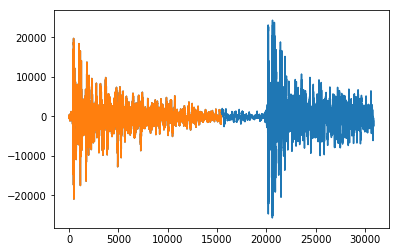

In [494]:
song = AudioSegment.from_wav('../../Source/Normal/Ball_change/4/2.wav')
plt.plot(np.array(song.get_array_of_samples()))
part1 = song[:song.duration_seconds/2*1000]
part2 = song[song.duration_seconds/2*1000:]
plt.plot(np.array(part1.get_array_of_samples()))

In [495]:
first_wave_amp = np.array(part1.get_array_of_samples()).max()
second_wave_amp = np.array(part2.get_array_of_samples()).max()
first_wave_idx = np.array(part1.get_array_of_samples()).argmax()
second_wave_idx = np.array(part2.get_array_of_samples()).argmax()+ len(part1.get_array_of_samples())
print (first_wave_amp, second_wave_amp)
print(first_wave_idx, second_wave_idx)

19770 24375
448 20623


In [496]:
first_wave_amp_list.append(first_wave_amp)
second_wave_amp_list.append(second_wave_amp)
first_wave_idx_list.append(first_wave_idx)
second_wave_idx_list.append(second_wave_idx)

### Export the four lists to csv to use in DataFrame

In [505]:
diff_list = []
for i in range (len(first_wave_idx_list)):
    diff_list.append(second_wave_idx_list[i] - first_wave_idx_list[i])

peak_info = pd.DataFrame({'Peak_1':first_wave_amp_list,
                          'Peak_2':second_wave_amp_list,
                          'Peak_1_idx':first_wave_idx_list,
                          'Peak_2_idx':second_wave_idx_list,
                          'Peak_dist':diff_list
                         })

In [506]:
peak_info

,Peak_1,Peak_2,Peak_1_idx,Peak_2_idx,Peak_dist
0,32767,32767,16278,26016,9738
1,32767,32767,17341,29507,12166
2,32767,32767,15455,30247,14792
3,32767,32767,7392,17930,10538
4,29403,29080,179,28424,28245
5,29125,27785,14674,23830,9156
6,32767,31129,9086,17849,8763
7,25438,32767,5732,16867,11135
8,31638,32767,11724,24586,12862
9,28943,32767,21934,35041,13107


In [507]:
#peak_info.to_csv('peak_info.csv')